In [9]:
import os
import keras
import json
import glob
import sys
import pandas as pd
import tensorflow as tf
from keras.layers import Input
import numpy as np
import argparse

from keras.utils.data_utils import get_file

import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add,Normalization
from tensorflow.keras import models,optimizers
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2,l1,l1_l2
from tensorflow.keras.optimizers import Adam
! pip install keras_tuner
import keras_tuner as kt
from keras import backend as K

import fnmatch
import re
import copy
import matplotlib.pyplot as plt
import scipy.signal
! pip install mpu
import mpu
import gc
#from script_onelist_colab import norm_int,repair,csv_exp,sel_exp,maxima,import_raw,read_processed,read_processed_sel,correct,onelist,interpolate_mat,interpolation_spectra

def touch(fname):
    if os.path.exists(fname):
        os.utime(fname, None)
    else:
        os.mkdir(fname)

#folder='/content/drive/MyDrive/PhD/CD_ML/CD_ML/alciML/csv/'
#if not os.path.abspath('')=='/content/drive/MyDrive/PhD/CD_ML/CD_ML/alciML/csv':
#  os.chdir(folder)
#print(os.path.abspath(''))  
#touch(folder+'png')





In [14]:
df3=pd.read_pickle('PL_LT_augmented_onemat_pd.pkl')
df3=df3.sample(frac=1)
beverages=pd.read_pickle('PL_LT_beverage_onemat_pd_2.pkl')
beverages=beverages.sample(frac=1)
beverages['alcohol_concentration']=beverages['alcohol_concentration']/100

In [5]:
np.amax(beverages['100_PLspec'].iloc[11])

19277

In [6]:
def dropzero(df,colu,size):
  listl=[]
  for i in range(len(df[colu])):
    if np.shape(df[colu].iloc[i]) != size:
      listl.append(df.index.values[i])
  for k in listl:
    print(listl)
    print(len(listl))
    df=df.drop(k)
  return df

def fill(x,source):
  y=x
  for col in source.columns:

    if np.isnan(np.amax(np.amax(x[col]))):
      nancheck=0
      while nancheck==0:
        newval=source[col].iloc[np.random.randint(0,len(source))]

        if not np.isnan(np.amax(np.amax(newval))):
          print('yes')
          nancheck=1
     # print(np.shape(noise(newval)))
      y[col]=noise(newval)    
  return y

def monoExp(x, m, t, b):
    return m * np.exp(-x/t) + b

def monoexp_dec_df(value):
  argmax=np.argmax(value[:,1])
  xv=np.asarray((value[argmax:,0]-value[argmax-1,0])/1023*200, dtype=np.longdouble)
  yv=np.asarray(value[argmax:,1]/65535, dtype=np.longdouble)
  p0=(1,3,0.002)
  params, cv = scipy.optimize.curve_fit(monoExp, xv, yv, p0)
  m, t, b = params
  print(t)
  return params

In [7]:
df3=dropzero(df3,"300_LT405spec",(1024,2))
df3=dropzero(df3,"300_LT450spec",(1024,2))
df3=dropzero(df3,"150_LT405spec",(1024,2))
df3=dropzero(df3,"150_LT450spec",(1024,2))
df3=dropzero(df3,"100_LT405spec",(1024,2))
df3=dropzero(df3,"100_LT450spec",(1024,2))
df3=dropzero(df3,"300_PLspec",(16,217))
df3=dropzero(df3,"150_PLspec",(16,217))
df3=dropzero(df3,"100_PLspec",(16,217))

[280]
1


In [8]:
beverages

,alcohol_concentration,beverage,blank_LT405spec,blank_LT450spec,blank_PLspec,300_LT405spec,300_LT450spec,300_PLspec,150_LT405spec,150_LT450spec,150_PLspec,100_LT405spec,100_LT450spec,100_PLspec
15,0.048,bitburgerpils,"[[0, 83], [1, 83], [2, 91], [3, 100], [4, 102]...","[[0, 72], [1, 72], [2, 77], [3, 87], [4, 93], ...","[[300, 0, 0, 16, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0,...","[[0, 125], [1, 126], [2, 137], [3, 143], [4, 1...","[[0, 138], [1, 136], [2, 178], [3, 129], [4, 1...","[[300, 0, 0, 0, 0, 0, 0, 0, 5, 1072, 0, 0, 0, ...","[[0, 81], [1, 79], [2, 74], [3, 76], [4, 78], ...","[[0, 82], [1, 82], [2, 87], [3, 90], [4, 101],...","[[300, 0, 0, 0, 0, 0, 3278, 0, 0, 0, 20, 0, 0,...","[[0, 147], [1, 147], [2, 153], [3, 126], [4, 1...","[[0, 96], [1, 96], [2, 107], [3, 106], [4, 118...","[[300, 8, 6, 15, 5, 0, 2, 12, 0, 0, 0, 3, 0, 0..."
3,0.130,whitewine2,"[[0, 79], [1, 79], [2, 77], [3, 71], [4, 73], ...","[[0, 66], [1, 66], [2, 66], [3, 56], [4, 69], ...","[[300, 0, 0, 0, 0, 13, 0, 0, 13, 26, 7, 10, 0,...","[[0, 206], [1, 206], [2, 197], [3, 219], [4, 1...","[[0, 968], [1, 968], [2, 988], [3, 921], [4, 1...","[[300, 0, 0, 0, 0, 0, 4, 5, 4, 0, 0, 1, 5, 0, ...","[[0, 66], [1, 66], [2, 71], [3, 67], [4, 68], ...","[[0, 398], [1, 398], [2, 400], [3, 473], [4, 4...","[[300, 13, 10, 0, 5, 3, 5, 5, 5, 0, 0, 1, 3, 7...","[[0, 51], [1, 51], [2, 59], [3, 56], [4, 58], ...","[[0, 133], [1, 133], [2, 127], [3, 130], [4, 1...","[[300, 0, 3, 3, 0, 2, 1, 0, 10, 4, 4, 0, 7, 2,..."
17,0.300,limoncello,"[[0, 42], [1, 42], [2, 45], [3, 37], [4, 39], ...","[[0, 37], [1, 37], [2, 29], [3, 41], [4, 36], ...","[[300, 0, 0, 0, 0, 0, 0, 0, 7, 0, 22, 0, 0, 11...","[[0, 57], [1, 57], [2, 68], [3, 55], [4, 55], ...","[[0, 52], [1, 52], [2, 60], [3, 66], [4, 75], ...","[[300, 2, 0, 3, 5, 0, 14, 0, 0, 0, 0, 13, 0, 1...","[[0, 61], [1, 61], [2, 70], [3, 72], [4, 68], ...","[[0, 49], [1, 49], [2, 62], [3, 62], [4, 55], ...","[[300, 0, 6, 2, 0, 0, 0, 15, 0, 0, 0, 10, 7, 0...","[[0, 57], [1, 57], [2, 66], [3, 62], [4, 64], ...","[[0, 56], [1, 56], [2, 59], [3, 68], [4, 47], ...","[[300, 0, 7, 10, 0, 1, 14, 2, 0, 12, 0, 0, 7, ..."
1,0.000,bitburgerdrive,"[[0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [5, 0...","[[0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [5, 0...","[[300, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0, 76], [1, 76], [2, 81], [3, 96], [4, 77], ...","[[0, 68], [1, 67], [2, 103], [3, 94], [4, 99],...","[[300, 902, 4, 0, 0, 0, 0, 0, 0, 900, 0, 902, ...","[[0, 97], [1, 97], [2, 92], [3, 96], [4, 95], ...","[[0, 76], [1, 76], [2, 73], [3, 68], [4, 73], ...","[[300, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[[0, 68], [1, 68], [2, 80], [3, 76], [4, 75], ...","[[0, 61], [1, 61], [2, 77], [3, 75], [4, 73], ...","[[300, 0, 0, 0, 0, 6, 8, 3, 2, 0, 0, 5, 0, 0, ..."
9,0.090,chimay,"[[0, 75], [1, 75], [2, 69], [3, 79], [4, 73], ...","[[0, 54], [1, 54], [2, 50], [3, 71], [4, 62], ...","[[300, 37, 16, 32, 58, 23, 4, 19, 0, 26, 48, 5...","[[0, 164], [1, 164], [2, 173], [3, 188], [4, 1...","[[0, 195], [1, 195], [2, 191], [3, 179], [4, 1...","[[300, 13, 6, 4, 6, 0, 8, 11, 8, 2, 4, 2, 6, 1...","[[0, 104], [1, 104], [2, 110], [3, 89], [4, 97...","[[0, 159], [1, 159], [2, 143], [3, 139], [4, 1...","[[300, 0, 0, 4, 0, 5, 0, 0, 0, 0, 4, 0, 0, 0, ...","[[0, 66], [1, 66], [2, 69], [3, 78], [4, 67], ...","[[0, 81], [1, 81], [2, 85], [3, 88], [4, 88], ...","[[300, 7, 0, 0, 16, 0, 5, 0, 4, 4, 4, 0, 12, 9..."
5,0.135,whitewine,"[[0, 88], [1, 88], [2, 86], [3, 85], [4, 90], ...","[[0, 91], [1, 91], [2, 81], [3, 79], [4, 87], ...","[[300, 11, 32, 42, 78, 108, 0, 0, 0, 0, 65, 49...","[[0, 476], [1, 476], [2, 535], [3, 500], [4, 4...","[[0, 2267], [1, 2267], [2, 2160], [3, 2192], [...","[[300, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, ...","[[0, 104], [1, 104], [2, 112], [3, 102], [4, 1...","[[0, 800], [1, 800], [2, 765], [3, 661], [4, 6...","[[300, 0, 10, 3, 9, 8, 0, 1, 8, 0, 6, 12, 6, 0...","[[0, 64], [1, 64], [2, 58], [3, 57], [4, 58], ...","[[0, 193], [1, 193], [2, 218], [3, 210], [4, 2.

In [7]:
# df3.to_pickle('PL_LT_augmented_onemat_pd_dropna.pkl')

In [8]:
m=df3['blank_LT405spec'].isna()
l=m.sum()
s = np.random.choice(df3['blank_LT405spec'].dropna(), size=l)
df3.loc[m, 'blank_LT405spec'] = s

m=df3['blank_LT450spec'].isna()
l=m.sum()
s = np.random.choice(df3['blank_LT450spec'].dropna(), size=l)
df3.loc[m, 'blank_LT450spec'] = s

m=df3['blank_PLspec'].isna()
l=m.sum()
s = np.random.choice(df3['blank_PLspec'].dropna(), size=l)
df3.loc[m, 'blank_PLspec'] = s

In [9]:
def plot_data_LT(source, sets, rows, cols, lower_value, upper_value):
    fig = plt.figure(figsize=(cols*4,rows*3))
    for i in range(1, cols*rows + 1):
        k = np.random.randint(lower_value,upper_value)
        fig.add_subplot(rows, cols, i) # adding sub plot
        alc = source.alcohol_concentration.iloc[k]
        alc=str("{:10.1f}".format(alc*100))+'%' 
        plot_lt(source,k,sets)
        # plt.axis('off')
        plt.title(f'Alcohol Concentration:{alc}')
    plt.tight_layout()
    plt.show()

def plot_lt(source,ind,sets):
  argmax=np.argmax(source.iloc[ind][sets][:,1])
  xv=np.asarray((source.iloc[ind][sets][argmax:,0]-source.iloc[ind][sets][argmax-1,0])/1023*200, dtype=np.longdouble)
  yv=np.asarray(source.iloc[ind][sets][argmax:,1]/65535, dtype=np.longdouble)
  p0=(1,3,0.002)
  params, cv = scipy.optimize.curve_fit(monoExp, xv, yv, p0)
  m, t, b = params
  plt.plot(xv,yv) 
  lbl='Lifetime'+("{:10.2f}".format(t))+'ns' 
  plt.plot(xv, monoExp(xv, m, t, b), '--', label=lbl) 
  plt.xlim(0,60)
  plt.ylim(-0.05,1.1)
  plt.text(33,0.97,lbl)
  plt.xlabel('Time (ns)')
  plt.ylabel('Intensity (a.u.)')
  # plt.savefig("png/LT_fit"+str(ind)+".png")

def plot_lt_pred(source,ind):
  plt.plot(np.arange(0,1024),Xobs[ind]) 
  plt.xlim(0,60)
  plt.ylim(-0.05,1.1)
  plt.xlabel('Time (ns)')
  plt.ylabel('Intensity (a.u.)')
  # plt.savefig("png/LT_fit"+str(ind)+".png")

def plot_data_PL(source, sets, rows, cols, lower_value, upper_value):
    fig = plt.figure(figsize=(cols*4,rows*20))
    for i in range(1, cols*rows + 1):
        k = np.random.randint(lower_value,upper_value)
        fig.add_subplot(rows, cols, i) # adding sub plot
        alc = source.alcohol_concentration.iloc[k]
        alc=str("{:10.1f}".format(alc*100))+'%'
        im = source.loc[:,sets].iloc[k]
        plt.imshow(im,extent=[320,750,300,600],origin="lower")
        plt.axis('off')
        plt.title(f'Alcohol Concentration:{alc}')
    plt.tight_layout()
    plt.show()

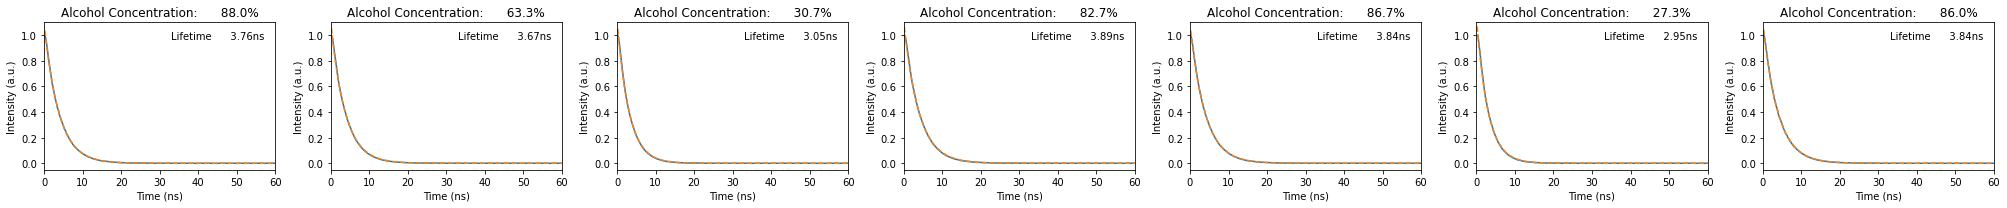

In [10]:
plot_data_LT(source=df3,sets='100_LT450spec',rows=1, cols=7, lower_value=0, upper_value=len(df3))

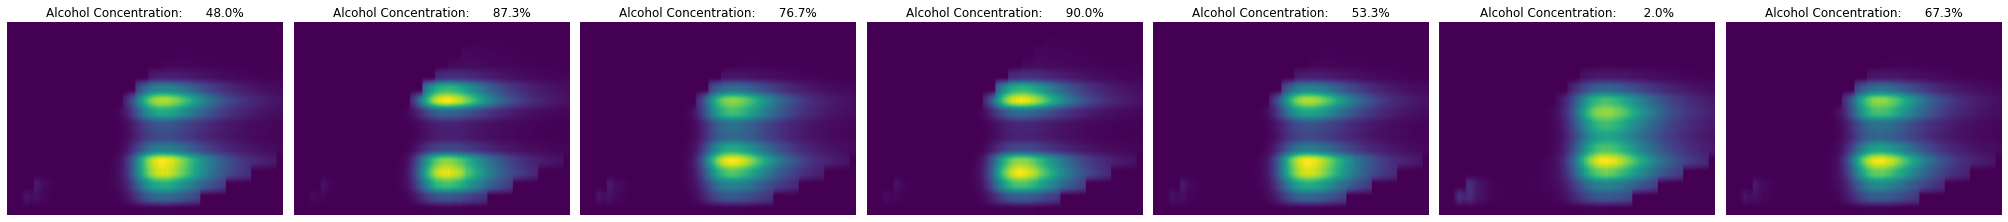

In [11]:
plot_data_PL(source=df3,sets="100_PLspec",rows=1, cols=7, lower_value=0, upper_value=len(df3))

In [12]:
def XY_creation_LT(source,colu):
  X = np.zeros(shape=(len(source[colu]),1024))
  for i in range(len(source[colu])):
    X[i] = source[colu].iloc[i][:,1]/65535
  print(X.dtype)

  #Alcohol
  ac = source['alcohol_concentration']
  ac=ac.astype(float)*100
  ac= np.array(ac)
  labels_f =[]
  i=0
  while i <len(ac):
    label=[]
    label.append([ac[i]])
    labels_f.append(label)
    i+=1
  labels_f =np.array(labels_f)
  labels_f.shape
  return X,ac

def XY_creation_PL(source,colu):
  X = np.zeros(shape=(len(source[colu]),16,217))
  for i in range(len(source[colu])):
    X[i] = source[colu].iloc[i]/65535
  print(X.dtype)

  #Alcohol
  ac = source['alcohol_concentration']
  ac=ac.astype(float)*100
  ac= np.array(ac)
  labels_f =[]
  i=0
  while i <len(ac):
    label=[]
    label.append([ac[i]])
    labels_f.append(label)
    i+=1
  labels_f =np.array(labels_f)
  labels_f.shape
  return X,labels_f

In [13]:
def XY_creation_LTn(source,colu):
  X = np.zeros(shape=(len(source[colu]),1024))
  for i in range(len(source[colu])):
    X[i] = source[colu].iloc[i][:,1]/np.amax(source[colu].iloc[i][:,1])
  print(X.dtype)

  #Alcohol
  ac = source['alcohol_concentration']
  ac=ac.astype(float)*100
  ac= np.array(ac)
  labels_f =[]
  i=0
  while i <len(ac):
    label=[]
    label.append([ac[i]])
    labels_f.append(label)
    i+=1
  labels_f =np.array(labels_f)
  labels_f.shape
  return X,ac

def XY_creation_PLn(source,colu):
  X = np.zeros(shape=(len(source[colu]),16,217))
  for i in range(len(source[colu])):
    X[i] = source[colu].iloc[i]/np.amax(source[colu].iloc[i][:,1])
  print(X.dtype)

  #Alcohol
  ac = source['alcohol_concentration']
  ac=ac.astype(float)*100
  ac= np.array(ac)
  labels_f =[]
  i=0
  while i <len(ac):
    label=[]
    label.append([ac[i]])
    labels_f.append(label)
    i+=1
  labels_f =np.array(labels_f)
  labels_f.shape
  return X,labels_f

In [14]:
LT100450,labels100LT=XY_creation_LT(df3.iloc[50:,:],"100_LT450spec")
LT100405,labels100LT=XY_creation_LT(df3.iloc[50:,:],"100_LT405spec")
PL100,labels100PL=XY_creation_PL(df3.iloc[50:,:],"100_PLspec")
LT150450,labels150LT=XY_creation_LT(df3.iloc[50:,:],"150_LT450spec")
LT150405,labels150LT=XY_creation_LT(df3.iloc[50:,:],"150_LT405spec")
PL150,labels150PL=XY_creation_PL(df3.iloc[50:,:],"150_PLspec")
LT300450,labels300LT=XY_creation_LT(df3.iloc[50:,:],"300_LT450spec")
LT300405,labels300LT=XY_creation_LT(df3.iloc[50:,:],"300_LT405spec")
PL300,labels300PL=XY_creation_PL(df3.iloc[50:,:],"300_PLspec")
LTblank450,labelsblankLT=XY_creation_LT(df3.iloc[50:,:],"blank_LT450spec")
LTblank405,labelsblankLT=XY_creation_LT(df3.iloc[50:,:],"blank_LT405spec")
PLblank,labelsblankPL=XY_creation_PL(df3.iloc[50:,:],"blank_PLspec")

LT100450_hold,labels100LT_hold=XY_creation_LT(df3.iloc[:50,:],"100_LT450spec")
LT100405_hold,labels100LT_hold=XY_creation_LT(df3.iloc[:50,:],"100_LT405spec")
PL100_hold,labels100PL_hold=XY_creation_PL(df3.iloc[:50,:],"100_PLspec")
LT150450_hold,labels150LT_hold=XY_creation_LT(df3.iloc[:50,:],"150_LT450spec")
LT150405_hold,labels150LT_hold=XY_creation_LT(df3.iloc[:50,:],"150_LT405spec")
PL150_hold,labels150PL_hold=XY_creation_PL(df3.iloc[:50,:],"150_PLspec")
LT300450_hold,labels300LT_hold=XY_creation_LT(df3.iloc[:50,:],"300_LT450spec")
LT300405_hold,labels300LT_hold=XY_creation_LT(df3.iloc[:50,:],"300_LT405spec")
PL300_hold,labels300PL_hold=XY_creation_PL(df3.iloc[:50,:],"300_PLspec")
LTblank450_hold,labelsblankLT_hold=XY_creation_LT(df3.iloc[:50,:],"blank_LT450spec")
LTblank405_hold,labelsblankLT_hold=XY_creation_LT(df3.iloc[:50,:],"blank_LT405spec")
PLblank_hold,labelsblankPL_hold=XY_creation_PL(df3.iloc[:50,:],"blank_PLspec")

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


In [15]:
bevLT100450,bevlabels100LT=XY_creation_LT(beverages,"100_LT450spec")
bevLT100405,bevlabels100LT=XY_creation_LT(beverages,"100_LT405spec")
bevPL100,bevlabels100PL=XY_creation_PL(beverages,"100_PLspec")
bevLT150450,bevlabels150LT=XY_creation_LT(beverages,"150_LT450spec")
bevLT150405,bevlabels150LT=XY_creation_LT(beverages,"150_LT405spec")
bevPL150,bevlabels150PL=XY_creation_PL(beverages,"150_PLspec")
bevLT300450,bevlabels300LT=XY_creation_LT(beverages,"300_LT450spec")
bevLT300405,bevlabels300LT=XY_creation_LT(beverages,"300_LT405spec")
bevPL300,bevlabels300PL=XY_creation_PL(beverages,"300_PLspec")
bevLTblank450,bevlabelsblankLT=XY_creation_LT(beverages,"blank_LT450spec")
bevLTblank405,bevlabelsblankLT=XY_creation_LT(beverages,"blank_LT405spec")
bevPLblank,bevlabelsblankPL=XY_creation_PL(beverages,"blank_PLspec")

float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64
float64


In [16]:
(PL150_train,PL150_test, LT150450_train,LT150450_test, LT150405_train,LT150405_test, Y150_train,Y150_test, 
PL100_train,PL100_test, LT100450_train,LT100450_test,LT100405_train,LT100405_test, Y100_train,Y100_test,
PL300_train,PL300_test, LT300450_train,LT300450_test, LT300405_train,LT300405_test, Y300_train,Y300_test, 
PLblank_train,PLblank_test, LTblank450_train,LTblank450_test,LTblank405_train,LTblank405_test, Yblank_train,Yblank_test)= train_test_split(
    PL150, LT150450, LT150405,labels150LT,PL100, LT100450, LT100405,labels100LT,
    PL300, LT300450, LT300405,labels300LT,PLblank, LTblank450, LTblank405,labelsblankLT,test_size=0.4)


In [27]:
trainset = tf.data.Dataset.from_tensors(
   {"PL150in": tf.expand_dims(PL150_train,-1),
   "LT150405in":LT150405_train,
   "LT150450in":LT150450_train,
   "PL100in":tf.expand_dims(PL100_train,-1),
   "LT100405in":LT100405_train,
   "LT100450in":LT100450_train,
   "PL300in":tf.expand_dims(PL300_train,-1),
   "LT300405in":LT300405_train,
   "LT300450in":LT300450_train,
   "PLblankin":tf.expand_dims(PLblank_train,-1),
   "LTblank405in":LTblank405_train,
   "LTblank450in":LTblank450_train,
   })
trainlabel=tf.data.Dataset.from_tensors(Y100_train[:,np.newaxis])
train=tf.data.Dataset.zip((trainset, trainlabel))
train=train.unbatch()


testset = tf.data.Dataset.from_tensors(
   {"PL150in":tf.expand_dims(PL150_test,-1),
   "LT150405in":LT150405_test,
   "LT150450in":LT150450_test,
   "PL100in":tf.expand_dims(PL100_test,-1),
   "LT100405in":LT100405_test,
   "LT100450in":LT100450_test,
   "PL300in":tf.expand_dims(PL300_test,-1),
   "LT300405in":LT300405_test,
   "LT300450in":LT300450_test,
   "PLblankin":tf.expand_dims(PLblank_test,-1),
   "LTblank405in":LTblank405_test,
   "LTblank450in":LTblank450_test,
   })
testlabel=tf.data.Dataset.from_tensors(Y100_test[:,np.newaxis])
test=tf.data.Dataset.zip((testset, testlabel))
test=test.unbatch()

holdset = tf.data.Dataset.from_tensors(
   {"PL150in":tf.expand_dims(PL150_hold,-1),
   "LT150405in":tf.expand_dims(LT150405_hold,-1),
   "LT150450in":tf.expand_dims(LT150450_hold,-1),
   "PL100in":tf.expand_dims(PL100_hold,-1),
   "LT100405in":LT100405_hold,
   "LT100450in":LT100450_hold,
   "PL300in":tf.expand_dims(PL300_hold,-1),
   "LT300405in":tf.expand_dims(LT300405_hold,-1),
   "LT300450in":tf.expand_dims(LT300450_hold,-1),
   "PLblankin":tf.expand_dims(PLblank_hold,-1),
   "LTblank405in":tf.expand_dims(LTblank405_hold,-1),
   "LTblank450in":tf.expand_dims(LTblank450_hold,-1)
   })
holdlabel=tf.data.Dataset.from_tensors(labels100LT_hold[:,np.newaxis])
hold=tf.data.Dataset.zip((holdset, holdlabel))
hold=hold.unbatch()

#test = test.batch(1)
test = test.cache()
test = test.prefetch(tf.data.AUTOTUNE)
#train = train.batch(1)
train = train.cache()
train = train.prefetch(tf.data.AUTOTUNE)

bevset = tf.data.Dataset.from_tensors(
   {"PL150in": tf.expand_dims(bevPL150,-1),
   "LT150405in":bevLT150405,
   "LT150450in":bevLT150450,
   "PL100in":tf.expand_dims(bevPL100,-1),
   "LT100405in":bevLT100405,
   "LT100450in":bevLT100450,
   "PL300in":tf.expand_dims(bevPL300,-1),
   "LT300405in":bevLT300405,
   "LT300450in":bevLT300450,
   "PLblankin":tf.expand_dims(bevPLblank,-1),
   "LTblank405in":bevLTblank405,
   "LTblank450in":bevLTblank450,
   })
bevlabel=tf.data.Dataset.from_tensors(bevlabels100PL[:,np.newaxis])
bev=tf.data.Dataset.zip((bevset, bevlabel))
bev=bev.unbatch()

In [18]:
def scheduler(epoch, lr):
    if epoch < 300:
        return lr
    else:
        return lr * tf.math.exp(-0.0002)
callback = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [19]:
class LT_modelt:
  def __init__(self, inlabel,dense1=64,dense2=16,dropoutLT=0.2):
    self.input = Input((1024,),name=inlabel)
    self.norm = layers.LayerNormalization()(self.input)
    self.dense1= Dense(dense1,activation='relu')(self.norm)
    self.drop=Dropout(dropoutLT)(self.dense1)
    self.dense2=Dense(dense2,activation='relu')(self.drop)

class PL_modelt:
  def __init__(self, inlabel,input_shape,densePL=64,filter1=64,filter2=128,filter3=128,kernel1=3,kernel2=5,kernel3=9,dropoutPL1=0.2,dropoutPL2=0.2):
    self.input = Input((input_shape),name=inlabel)
    self.conv_1=Conv2D(filter1, (kernel2, kernel3), activation='relu', padding="same",input_shape=input_shape)(self.input)
    self.maxp_1 = MaxPooling2D(pool_size = (2,2)) (self.conv_1)
    self.drop1=Dropout(dropoutPL1)(self.maxp_1)
    self.conv_2=Conv2D(filter2, (kernel1, kernel2), activation='relu', padding="same")(self.drop1)
    self.maxp_2 = MaxPooling2D(pool_size = (2,2)) (self.conv_2)
    self.conv_3=Conv2D(filter3, (kernel1, kernel2), activation='relu', padding="same")(self.maxp_2)
    self.flatten=Flatten()(self.conv_3)
    self.drop2=Dropout(dropoutPL2)(self.flatten)
    self.densePL= Dense(densePL, activation='relu')(self.drop2)

In [19]:
class LT_model:
  def __init__(self, inlabel,dense1=64,dense2=16):
    self.input = Input((1024,),name=inlabel)
    self.norm = layers.LayerNormalization()(self.input)
    self.dense1= Dense(dense1,activation='relu')(self.norm)
    self.drop=Dropout(0.2)
    self.dense2=Dense(dense2,activation='relu')(self.dense1)

class LT_model_c:
  def __init__(self, inlabel):
    self.input = Input((1024,),name=inlabel)
    self.norm = layers.LayerNormalization()(self.input)
    self.dense1= Dense(8,activation='relu')(self.norm)
    self.dense2=Dense(32,activation='relu')(self.dense1)

class PL_model:
  def __init__(self, inlabel,input_shape,densePL=64):
    self.input = Input((input_shape),name=inlabel)
    self.conv_1=Conv2D(64, (5, 9), activation='relu', padding="same",input_shape=input_shape)(self.input)
    self.maxp_1 = MaxPooling2D(pool_size = (2,2)) (self.conv_1)
    self.drop=Dropout(0.1)
    self.conv_2=Conv2D(128, (3, 5), activation='relu', padding="same")(self.maxp_1)
    self.maxp_2 = MaxPooling2D(pool_size = (2,2)) (self.conv_2)
    self.conv_3=Conv2D(128, (3, 5), activation='relu', padding="same")(self.maxp_2)
    self.flatten=Flatten()(self.conv_3)
    self.drop=Dropout(0.3)
    self.densePL= Dense(densePL, activation='relu')(self.flatten)


In [20]:
LT100405=LT_modelt('LT100405in',dense1=64,dense2=16,dropoutLT=0.01)
LT100450=LT_modelt('LT100450in',dense1=64,dense2=16,dropoutLT=0.01)
concat = layers.concatenate([LT100450.dense2,LT100405.dense2])
dense4=Dense(8,activation='relu',kernel_regularizer=l2(0.0001))(concat)
dropout=Dropout(0.0)(dense4)
output_2= Dense(1,activation="relu",name='alc_pred')(dropout)
model_duoLT = Model(inputs=[LT100450.input,LT100405.input], outputs=[output_2])
model_duoLT.compile(loss="mae", optimizer='adam',metrics="mae")
model_checkpoint_callback_duo = tf.keras.callbacks.ModelCheckpoint(
    filepath='weights/DNN_duoLT_{epoch:02d}-{val_loss:.2f}.hdf5',
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

In [21]:
LT100450=LT_modelt('LT100450in',dropoutLT=0.01)
#dense4=Dense(8,activation='relu')(concat)
output_2= Dense(1,activation="relu",name='alc_pred',kernel_regularizer=l2(0.0001))(LT100450.dense2)
model_singleLT = Model(inputs=[LT100450.input], outputs=[output_2])
model_singleLT.compile(loss="mae", optimizer='adam',metrics="mae")
model_singleLT.save_weights('single_LT_default_weights')
model_checkpoint_callback_singleLT = tf.keras.callbacks.ModelCheckpoint(
    filepath='weights/DNN_singleLT_{epoch:02d}-{val_loss:.2f}.hdf5',
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

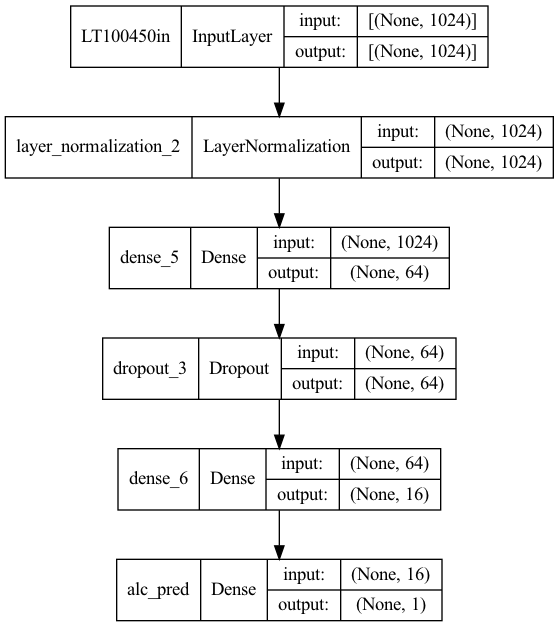

In [22]:
plot_model(model_singleLT, rankdir='TB',show_shapes=True,show_layer_names=True)
#model_concat.summary()

In [169]:
input_shape=(16,217,1)
filt1=32
filt2=64
filt3=128
kern1=3
kern2=5
kern3=9
denseP=32
dropout1=0.1
dropout2=0.2
dropoutlt=0.01
LT100405mod=LT_modelt('LT100405in',dense1=64,dense2=64,dropoutLT=dropoutlt)
LT100450mod=LT_modelt('LT100450in',dense1=64,dense2=64,dropoutLT=dropoutlt)
PL100mod=PL_modelt('PL100in',input_shape,densePL=denseP,filter1=filt1,filter2=filt2,filter3=filt3,kernel1=kern1,kernel2=kern2,kernel3=kern3,dropoutPL1=dropout1,dropoutPL2=dropout2)
LT150405mod=LT_modelt('LT150405in',dense1=64,dense2=64,dropoutLT=dropoutlt)
LT150450mod=LT_modelt('LT150450in',dense1=64,dense2=64,dropoutLT=dropoutlt)
PL150mod=PL_modelt('PL150in',input_shape,densePL=denseP,filter1=filt1,filter2=filt2,filter3=filt3,kernel1=kern1,kernel2=kern2,kernel3=kern3,dropoutPL1=dropout1,dropoutPL2=dropout2)
LT300405mod=LT_modelt('LT300405in',dense1=64,dense2=64,dropoutLT=dropoutlt)
LT300450mod=LT_modelt('LT300450in',dense1=64,dense2=64,dropoutLT=dropoutlt)
PL300mod=PL_modelt('PL300in',input_shape,densePL=denseP,filter1=filt1,filter2=filt2,filter3=filt3,kernel1=kern1,kernel2=kern2,kernel3=kern3,dropoutPL1=dropout1,dropoutPL2=dropout2)
LTblank405mod=LT_modelt('LTblank405in',dense1=64,dense2=64,dropoutLT=dropoutlt)
LTblank450mod=LT_modelt('LTblank450in',dense1=64,dense2=64,dropoutLT=dropoutlt)
PLblankmod=PL_modelt('PLblankin',input_shape,densePL=denseP,filter1=filt1,filter2=filt2,filter3=filt3,kernel1=kern1,kernel2=kern2,kernel3=kern3,dropoutPL1=dropout1,dropoutPL2=dropout2)


concat1 = layers.concatenate([LT100405mod.dense2,LT100450mod.dense2,PL100mod.densePL])
dense3=Dense(32,activation='relu')(concat1)
dropout=Dropout(0.01)(dense3)
output_2= Dense(1,activation="relu",name='alc_pred')(dropout)
model_combiPL = Model(inputs=[PL100mod.input,LT100405mod.input,LT100450mod.input], outputs=[output_2])
model_combiPL.compile(loss="mae", optimizer="adam",metrics="mae")

concat2 = layers.concatenate([LT100405mod.dense2,LT100450mod.dense2,PL100mod.densePL,LT150405mod.dense2,LT150450mod.dense2,PL150mod.densePL
                            ,LT300405mod.dense2,LT300450mod.dense2,PL300mod.densePL,LTblank405mod.dense2,LTblank450mod.dense2,PLblankmod.densePL])
dense4=Dense(64,activation='relu',kernel_regularizer=l1(0.0002))(concat2)
dropout=Dropout(0.4)(dense4)
output_2= Dense(1,activation="relu",name='alc_pred')(dropout)
model_combiPL_bg = Model(inputs=[PL100mod.input,LT100405mod.input,LT100450mod.input,PL150mod.input,LT150405mod.input,LT150450mod.input,
                              PL300mod.input,LT300405mod.input,LT300450mod.input,PLblankmod.input,LTblank405mod.input,LTblank450mod.input], outputs=[output_2])
model_combiPL_bg.compile(loss="mae", optimizer="adam",metrics="mae")

In [46]:
concat2 = layers.concatenate([LT100405mod.dense2,LT100450mod.dense2,PL100mod.densePL,LT150405mod.dense2,LT150450mod.dense2,PL150mod.densePL
                            ,LT300405mod.dense2,LT300450mod.dense2,PL300mod.densePL])
dense4=Dense(64,activation='relu')(concat2)
dropout=Dropout(0.3)(dense4)
output_2= Dense(1,activation="relu",name='alc_pred')(dropout)
model_combiPL_multi = Model(inputs=[PL100mod.input,LT100405mod.input,LT100450mod.input,PL150mod.input,LT150405mod.input,LT150450mod.input,
                              PL300mod.input,LT300405mod.input,LT300450mod.input], outputs=[output_2])
model_combiPL_multi.compile(loss="mae", optimizer="adam",metrics="mae")

output_single= Dense(1,activation="relu",name='alc_pred')(PL100mod.densePL)
model_PL = Model(inputs=[PL100mod.input], outputs=[output_single])
model_PL.compile(loss="mae", optimizer="adam",metrics="mae")

In [24]:
concat2 = layers.concatenate([PL100mod.densePL,PL150mod.densePL,PL300mod.densePL])
dense4=Dense(32,activation='relu')(concat2)
dropout=Dropout(0.4)(dense4)
output_2= Dense(1,activation="relu",name='alc_pred')(dropout)
model_PLthree = Model(inputs=[PL100mod.input,PL150mod.input,PL300mod.input], outputs=[output_2])
model_PLthree.compile(loss="mae", optimizer="adam",metrics="mae")

In [25]:
concat2 = layers.concatenate([LT100405mod.dense2,LT100450mod.dense2,LT150405mod.dense2,LT150450mod.dense2
                            ,LT300405mod.dense2,LT300450mod.dense2])
dense4=Dense(8,activation='relu',kernel_regularizer=l2(0.1))(concat2)
output_2= Dense(1,activation="relu",name='alc_pred')(dense4)
model_duoLT_multi = Model(inputs=[LT100405mod.input,LT100450mod.input,LT150405mod.input,LT150450mod.input,
                              LT300405mod.input,LT300450mod.input], outputs=[output_2])
model_duoLT_multi.compile(loss="mae", optimizer="adam",metrics="mae")

model_checkpoint_callback_duoLTmulti = tf.keras.callbacks.ModelCheckpoint(
    filepath='weights/DNN_duoLT_multi_{epoch:02d}-{val_loss:.2f}.hdf5',
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

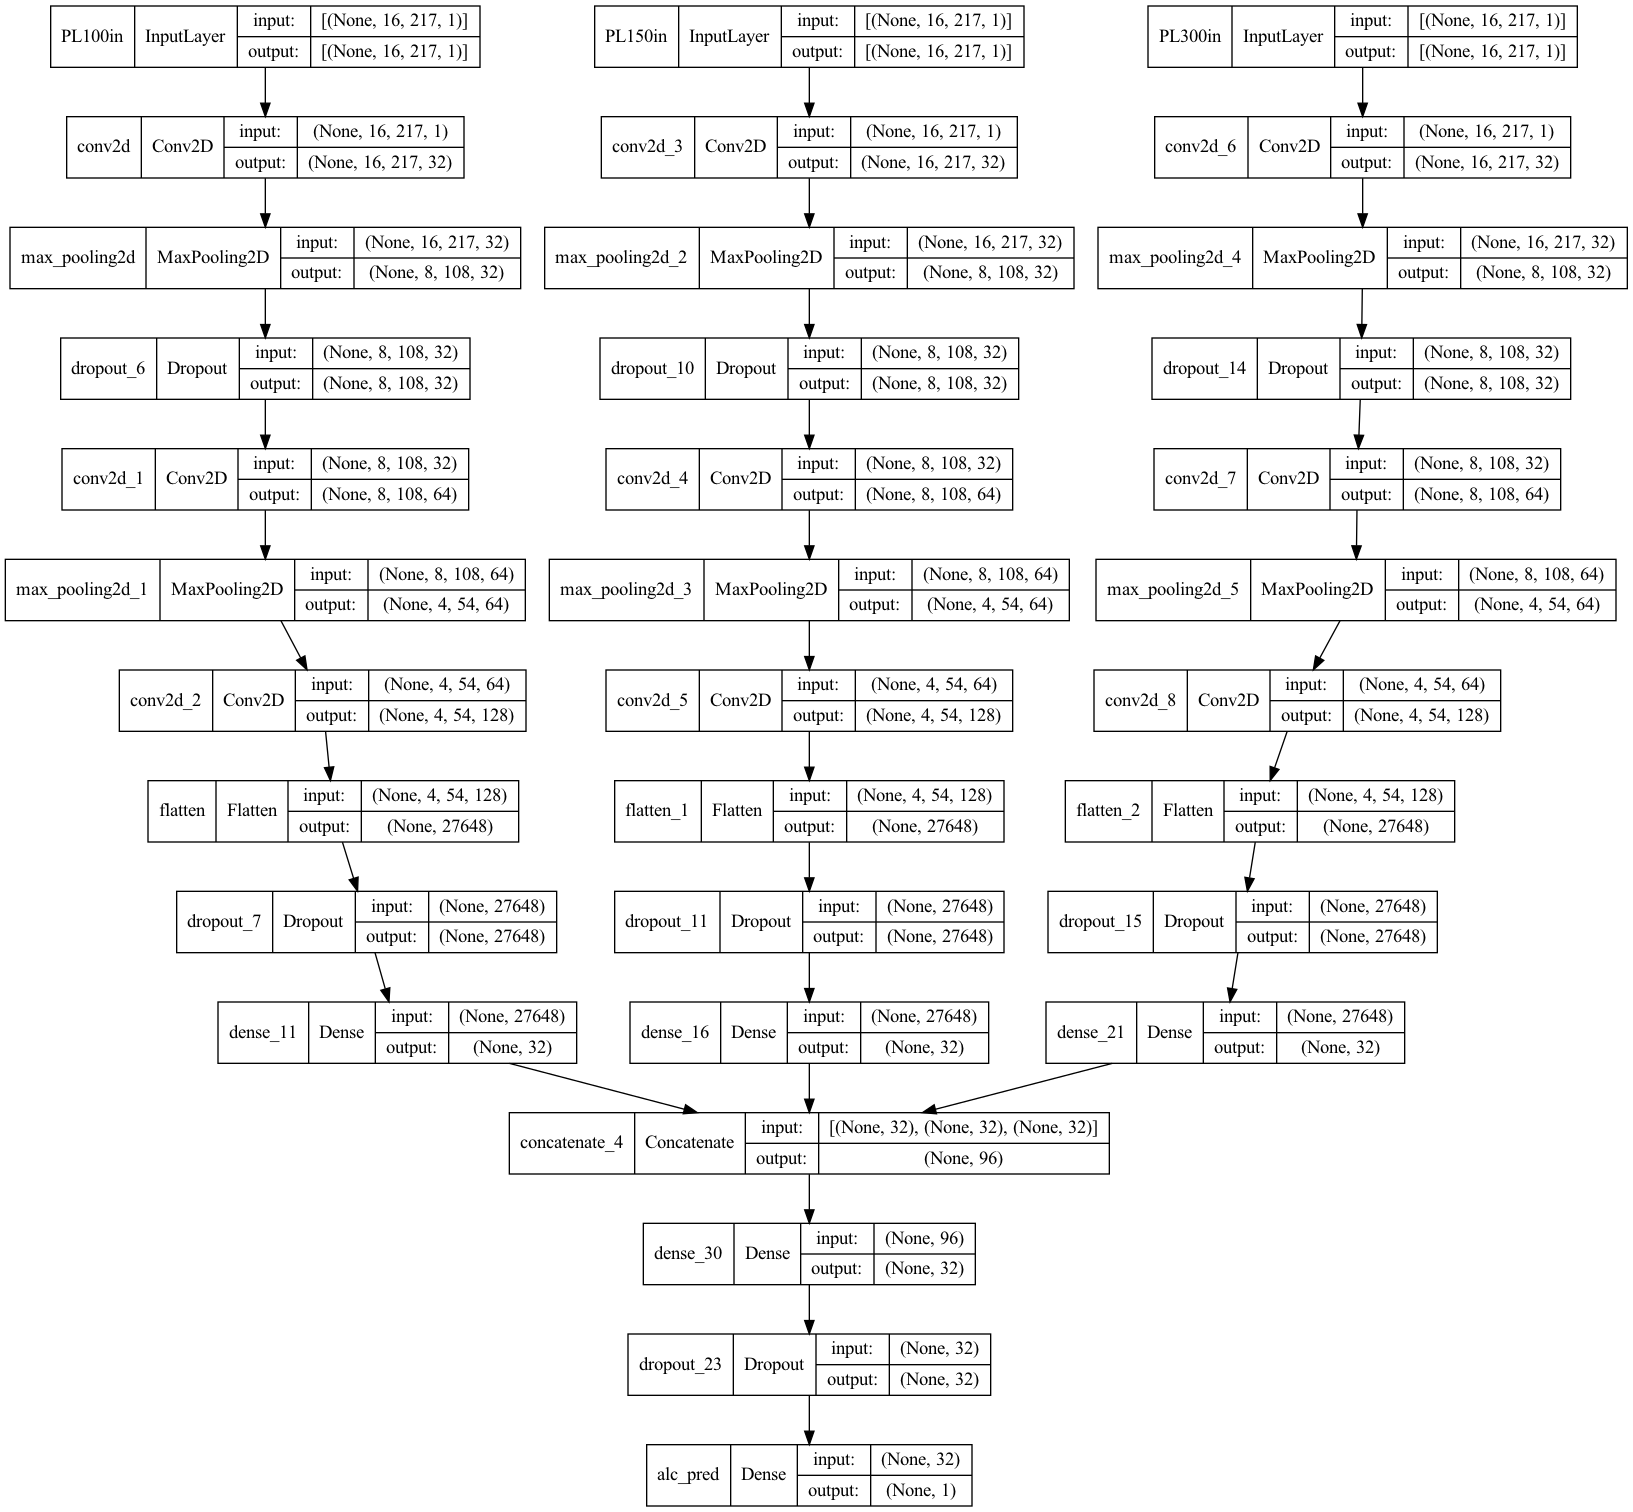

In [27]:
plot_model(model_PLthree, rankdir='TB',show_shapes=True,show_layer_names=True)

In [28]:
with tf.device('cpu:0'):
    History_duoLT=model_duoLT.fit(train.batch(32),validation_data=test.batch(1),callbacks=[model_checkpoint_callback_duo]
    ,epochs=2000)

Epoch 1/2000


/Users/aaron/miniforge3/envs/no-metal/lib/python3.9/site-packages/keras/engine/functional.py:559: UserWarning: Input dict contained keys ['PL150in', 'LT150405in', 'LT150450in', 'PL100in', 'PL300in', 'LT300405in', 'LT300450in', 'PLblankin', 'LTblank405in', 'LTblank450in'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)
2022-03-21 18:32:31.328500: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


10/10 [==============================] - 0s 23ms/step - loss: 52.7892 - mae: 52.7879 - val_loss: 50.1399 - val_mae: 50.1387
Epoch 2/2000
10/10 [==============================] - 0s 14ms/step - loss: 43.6333 - mae: 43.6320 - val_loss: 38.7181 - val_mae: 38.7168
Epoch 3/2000
10/10 [==============================] - 0s 13ms/step - loss: 33.0197 - mae: 33.0185 - val_loss: 26.6516 - val_mae: 26.6504
Epoch 4/2000
10/10 [==============================] - 0s 13ms/step - loss: 25.5561 - mae: 25.5548 - val_loss: 22.3733 - val_mae: 22.3721
Epoch 5/2000
10/10 [==============================] - 0s 14ms/step - loss: 23.9151 - mae: 23.9138 - val_loss: 22.4152 - val_mae: 22.4140
Epoch 6/2000
10/10 [==============================] - 0s 15ms/step - loss: 23.0002 - mae: 22.9990 - val_loss: 21.9080 - val_mae: 21.9069
Epoch 7/2000
10/10 [==============================] - 0s 15ms/step - loss: 22.6526 - mae: 22.6514 - val_loss: 21.6906 - val_mae: 21.6894
Epoch 8/2000
10/10 [==============================] - 

In [30]:
model_duoLT.load_weights('weights/DNN_duoLT_1989-0.53.hdf5')

In [31]:
model_duoLT.evaluate(test.batch(1))

212/212 [==============================] - 0s 462us/step - loss: 0.5345 - mae: 0.5308


[0.53445965051651, 0.5308072566986084]

In [33]:
model_duoLT.evaluate(bev.batch(1))

19/19 [==============================] - 0s 1ms/step - loss: 58.9559 - mae: 58.9522


/Users/aaron/miniforge3/envs/no-metal/lib/python3.9/site-packages/keras/engine/functional.py:559: UserWarning: Input dict contained keys ['PL150in', 'LT150405in', 'LT150450in', 'PL100in', 'PL300in', 'LT300405in', 'LT300450in', 'PLblankin', 'LTblank405in', 'LTblank450in'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


[58.955894470214844, 58.952239990234375]

In [32]:
model_duoLT.save('model_duoLT')

2022-03-21 18:49:46.015452: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model_duoLT/assets


INFO:tensorflow:Assets written to: model_duoLT/assets


In [35]:
with tf.device('cpu:0'):
    History_singleLT=model_singleLT.fit(train.batch(32),validation_data=test.batch(1),callbacks=[model_checkpoint_callback_singleLT]
    ,epochs=2000)

Epoch 1/2000
 1/10 [==>...........................] - ETA: 1s - loss: 60.7439 - mae: 60.7437

/Users/aaron/miniforge3/envs/no-metal/lib/python3.9/site-packages/keras/engine/functional.py:559: UserWarning: Input dict contained keys ['PL150in', 'LT150405in', 'LT150450in', 'PL100in', 'LT100405in', 'PL300in', 'LT300405in', 'LT300450in', 'PLblankin', 'LTblank405in', 'LTblank450in'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


10/10 [==============================] - 0s 17ms/step - loss: 53.1853 - mae: 53.1850 - val_loss: 50.8004 - val_mae: 50.8002
Epoch 2/2000
10/10 [==============================] - 0s 12ms/step - loss: 44.5521 - mae: 44.5519 - val_loss: 40.2202 - val_mae: 40.2199
Epoch 3/2000
10/10 [==============================] - 0s 12ms/step - loss: 34.4531 - mae: 34.4529 - val_loss: 28.5476 - val_mae: 28.5473
Epoch 4/2000
10/10 [==============================] - 0s 13ms/step - loss: 26.6497 - mae: 26.6494 - val_loss: 22.8396 - val_mae: 22.8393
Epoch 5/2000
10/10 [==============================] - 0s 12ms/step - loss: 23.8103 - mae: 23.8100 - val_loss: 22.3804 - val_mae: 22.3801
Epoch 6/2000
10/10 [==============================] - 0s 12ms/step - loss: 23.3582 - mae: 23.3579 - val_loss: 21.9589 - val_mae: 21.9587
Epoch 7/2000
10/10 [==============================] - 0s 12ms/step - loss: 22.7962 - mae: 22.7959 - val_loss: 21.7487 - val_mae: 21.7485
Epoch 8/2000
10/10 [==============================] - 

In [39]:
model_singleLT.load_weights('weights/DNN_singleLT_1984-0.78.hdf5')
model_singleLT.evaluate(test.batch(1))

212/212 [==============================] - 0s 404us/step - loss: 0.7821 - mae: 0.7804


[0.7821338772773743, 0.7803770899772644]

In [40]:
model_singleLT.evaluate(bev.batch(1))

19/19 [==============================] - 0s 1ms/step - loss: 54.8599 - mae: 54.8581


[54.85987091064453, 54.858116149902344]

In [41]:
model_singleLT.save('model_singleLT')

INFO:tensorflow:Assets written to: model_singleLT/assets


INFO:tensorflow:Assets written to: model_singleLT/assets


In [43]:

with tf.device('cpu:0'):
    History_duoLT_multi=model_duoLT_multi.fit(train.batch(32),validation_data=test.batch(1),callbacks=[model_checkpoint_callback_duoLTmulti]
    ,epochs=2000)

Epoch 1/2000


/Users/aaron/miniforge3/envs/no-metal/lib/python3.9/site-packages/keras/engine/functional.py:559: UserWarning: Input dict contained keys ['PL150in', 'PL100in', 'PL300in', 'PLblankin', 'LTblank405in', 'LTblank450in'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


10/10 [==============================] - 1s 34ms/step - loss: 56.4538 - mae: 54.9731 - val_loss: 54.0951 - val_mae: 52.7486
Epoch 2/2000
10/10 [==============================] - 0s 19ms/step - loss: 45.7319 - mae: 44.4750 - val_loss: 37.3363 - val_mae: 36.1808
Epoch 3/2000
10/10 [==============================] - 0s 19ms/step - loss: 30.9038 - mae: 29.8138 - val_loss: 24.7094 - val_mae: 23.6952
Epoch 4/2000
10/10 [==============================] - 0s 18ms/step - loss: 26.2288 - mae: 25.2784 - val_loss: 23.9062 - val_mae: 23.0431
Epoch 5/2000
10/10 [==============================] - 0s 21ms/step - loss: 24.5495 - mae: 23.7470 - val_loss: 23.4265 - val_mae: 22.6913
Epoch 6/2000
10/10 [==============================] - 0s 19ms/step - loss: 23.9803 - mae: 23.2860 - val_loss: 22.1684 - val_mae: 21.5210
Epoch 7/2000
10/10 [==============================] - 0s 19ms/step - loss: 22.7318 - mae: 22.1173 - val_loss: 21.2742 - val_mae: 20.7010
Epoch 8/2000
10/10 [==============================] - 

In [45]:
model_duoLT_multi.load_weights('weights/DNN_duoLT_multi_1995-0.38.hdf5')


In [46]:
model_duoLT_multi.evaluate(test.batch(1))

212/212 [==============================] - 0s 571us/step - loss: 0.3752 - mae: 0.2892


[0.3751567304134369, 0.2892072796821594]

In [48]:
model_duoLT_multi.evaluate(bev.batch(1))
model_duoLT_multi.save('model_duoLT_multi')


19/19 [==============================] - 0s 1ms/step - loss: 12.0051 - mae: 11.9191


INFO:tensorflow:Assets written to: model_duoLT_multi/assets


INFO:tensorflow:Assets written to: model_duoLT_multi/assets


In [29]:
model_checkpoint_callback_modelPL = tf.keras.callbacks.ModelCheckpoint(
    filepath='weights/model?PL_{epoch:02d}-{val_loss:.2f}.hdf5',
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)
with tf.device('gpu:0'):
    History_PL=model_PL.fit(train.batch(64),validation_data=test.batch(1),callbacks=[model_checkpoint_callback_modelPL]
    ,epochs=1000)



Epoch 1/1000


/Users/aaron/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/functional.py:559: UserWarning: Input dict contained keys ['PL150in', 'LT150405in', 'LT150450in', 'LT100405in', 'LT100450in', 'PL300in', 'LT300405in', 'LT300450in', 'PLblankin', 'LTblank405in', 'LTblank450in'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)
2022-03-21 21:43:27.286375: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-21 21:43:27.287221: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - ETA: 0s - loss: 55.4164 - mae: 55.4164

2022-03-21 21:43:30.240718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 4s 388ms/step - loss: 55.4164 - mae: 55.4164 - val_loss: 41.8200 - val_mae: 41.8200
Epoch 2/1000
5/5 [==============================] - 1s 219ms/step - loss: 29.0563 - mae: 29.0563 - val_loss: 26.3354 - val_mae: 26.3354
Epoch 3/1000
5/5 [==============================] - 1s 203ms/step - loss: 24.2233 - mae: 24.2233 - val_loss: 22.1620 - val_mae: 22.1620
Epoch 4/1000
5/5 [==============================] - 1s 202ms/step - loss: 21.6047 - mae: 21.6047 - val_loss: 21.6518 - val_mae: 21.6518
Epoch 5/1000
5/5 [==============================] - 1s 216ms/step - loss: 20.0667 - mae: 20.0667 - val_loss: 20.0213 - val_mae: 20.0213
Epoch 6/1000
5/5 [==============================] - 1s 218ms/step - loss: 18.6837 - mae: 18.6837 - val_loss: 19.4940 - val_mae: 19.4940
Epoch 7/1000
5/5 [==============================] - 1s 216ms/step - loss: 17.0537 - mae: 17.0537 - val_loss: 16.5918 - val_mae: 16.5918
Epoch 8/1000
5/5 [==============================] - 1s 208ms/

In [32]:
model_PL.load_weights('weights/model?PL_880-1.36.hdf5')
model_PL.evaluate(test.batch(1))
model_PL.evaluate(bev.batch(1))
model_PL.save('model_PL')

19/19 [==============================] - 0s 5ms/step - loss: 15.8011 - mae: 15.8011


2022-03-21 22:32:51.302670: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model_PL/assets


INFO:tensorflow:Assets written to: model_PL/assets


In [35]:
model_checkpoint_callback_modelPL_combi = tf.keras.callbacks.ModelCheckpoint(
    filepath='weights/modelPL_combi_{epoch:02d}-{val_loss:.2f}.hdf5',
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)
with tf.device('gpu:0'):
    History_combiPL=model_combiPL.fit(train.batch(64),validation_data=test.batch(1),callbacks=[model_checkpoint_callback_modelPL_combi]
    ,epochs=1000)

Epoch 1/1000


/Users/aaron/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/functional.py:559: UserWarning: Input dict contained keys ['PL150in', 'LT150405in', 'LT150450in', 'PL300in', 'LT300405in', 'LT300450in', 'PLblankin', 'LTblank405in', 'LTblank450in'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)
2022-03-21 23:12:19.459653: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - ETA: 0s - loss: 57.4890 - mae: 57.4890

2022-03-21 23:12:20.940939: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 3s 512ms/step - loss: 57.4890 - mae: 57.4890 - val_loss: 54.1336 - val_mae: 54.1336
Epoch 2/1000
5/5 [==============================] - 1s 306ms/step - loss: 48.7834 - mae: 48.7834 - val_loss: 44.3346 - val_mae: 44.3346
Epoch 3/1000
5/5 [==============================] - 1s 309ms/step - loss: 35.1017 - mae: 35.1017 - val_loss: 23.8377 - val_mae: 23.8377
Epoch 4/1000
5/5 [==============================] - 1s 300ms/step - loss: 18.4473 - mae: 18.4473 - val_loss: 17.4917 - val_mae: 17.4917
Epoch 5/1000
5/5 [==============================] - 1s 332ms/step - loss: 15.8799 - mae: 15.8799 - val_loss: 14.0818 - val_mae: 14.0818
Epoch 6/1000
5/5 [==============================] - 1s 325ms/step - loss: 13.2391 - mae: 13.2391 - val_loss: 9.9661 - val_mae: 9.9661
Epoch 7/1000
5/5 [==============================] - 1s 330ms/step - loss: 9.7007 - mae: 9.7007 - val_loss: 7.6598 - val_mae: 7.6598
Epoch 8/1000
5/5 [==============================] - 1s 311ms/step -

In [36]:
model_combiPL.load_weights('weights/modelPL_combi_847-1.20.hdf5')
model_combiPL.evaluate(test.batch(1))
model_combiPL.evaluate(bev.batch(1))
model_combiPL.save('model_combiPL')

 1/19 [>.............................] - ETA: 4s - loss: 28.3177 - mae: 28.3177

2022-03-21 23:32:52.469035: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - 0s 8ms/step - loss: 12.9700 - mae: 12.9700


INFO:tensorflow:Assets written to: model_combiPL/assets


INFO:tensorflow:Assets written to: model_combiPL/assets


In [33]:
model_checkpoint_callback_modelPLthree = tf.keras.callbacks.ModelCheckpoint(
    filepath='weights/model_PLthree_{epoch:02d}-{val_loss:.2f}.hdf5',
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)
with tf.device('gpu:0'):
    History_PLthree=model_PLthree.fit(train.batch(64),validation_data=test.batch(1),callbacks=[model_checkpoint_callback_modelPLthree]
    ,epochs=1000)

Epoch 1/1000


/Users/aaron/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/functional.py:559: UserWarning: Input dict contained keys ['LT150405in', 'LT150450in', 'LT100405in', 'LT100450in', 'LT300405in', 'LT300450in', 'PLblankin', 'LTblank405in', 'LTblank450in'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)
2022-03-21 22:34:19.730196: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - ETA: 0s - loss: 51.2268 - mae: 51.2268

2022-03-21 22:34:20.897474: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 3s 497ms/step - loss: 51.2268 - mae: 51.2268 - val_loss: 34.4671 - val_mae: 34.4671
Epoch 2/1000
5/5 [==============================] - 2s 418ms/step - loss: 24.2185 - mae: 24.2185 - val_loss: 10.6970 - val_mae: 10.6970
Epoch 3/1000
5/5 [==============================] - 2s 366ms/step - loss: 16.2276 - mae: 16.2276 - val_loss: 3.5493 - val_mae: 3.5493
Epoch 4/1000
5/5 [==============================] - 2s 361ms/step - loss: 13.9893 - mae: 13.9893 - val_loss: 10.8946 - val_mae: 10.8946
Epoch 5/1000
5/5 [==============================] - 2s 378ms/step - loss: 12.9870 - mae: 12.9870 - val_loss: 5.7756 - val_mae: 5.7756
Epoch 6/1000
5/5 [==============================] - 2s 378ms/step - loss: 12.0094 - mae: 12.0094 - val_loss: 5.7652 - val_mae: 5.7652
Epoch 7/1000
5/5 [==============================] - 2s 371ms/step - loss: 10.9928 - mae: 10.9928 - val_loss: 7.2023 - val_mae: 7.2023
Epoch 8/1000
5/5 [==============================] - 1s 354ms/step - l

In [34]:
model_PLthree.load_weights('weights/model_PLthree_699-1.40.hdf5')
model_PLthree.evaluate(test.batch(1))
model_PLthree.evaluate(bev.batch(1))
model_PLthree.save('model_PLthree')

212/212 [==============================] - 2s 9ms/step - loss: 1.4027 - mae: 1.4027


/Users/aaron/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/functional.py:559: UserWarning: Input dict contained keys ['LT150405in', 'LT150450in', 'LT100405in', 'LT100450in', 'LT300405in', 'LT300450in', 'PLblankin', 'LTblank405in', 'LTblank450in'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)
2022-03-21 23:10:08.447913: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - 0s 8ms/step - loss: 14.2114 - mae: 14.2114


INFO:tensorflow:Assets written to: model_PLthree/assets


INFO:tensorflow:Assets written to: model_PLthree/assets


In [47]:
model_checkpoint_model_combiPL_multi = tf.keras.callbacks.ModelCheckpoint(
    filepath='weights/model_combiPL_multi_{epoch:02d}-{val_loss:.2f}.hdf5',
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)
with tf.device('gpu:0'):
    History_combiPL_multi=model_combiPL_multi.fit(train.batch(64),validation_data=test.batch(2),callbacks=[model_checkpoint_model_combiPL_multi]
    ,epochs=1000)

Epoch 1/1000


2022-03-22 12:42:43.782939: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - ETA: 0s - loss: 52.0336 - mae: 52.0336

2022-03-22 12:42:45.792992: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


5/5 [==============================] - 4s 608ms/step - loss: 52.0336 - mae: 52.0336 - val_loss: 41.4405 - val_mae: 41.4405
Epoch 2/1000
5/5 [==============================] - 2s 338ms/step - loss: 29.9447 - mae: 29.9447 - val_loss: 21.7852 - val_mae: 21.7852
Epoch 3/1000
5/5 [==============================] - 1s 334ms/step - loss: 25.0239 - mae: 25.0239 - val_loss: 26.9776 - val_mae: 26.9776
Epoch 4/1000
5/5 [==============================] - 1s 338ms/step - loss: 23.6913 - mae: 23.6913 - val_loss: 20.5382 - val_mae: 20.5382
Epoch 5/1000
5/5 [==============================] - 1s 333ms/step - loss: 22.9899 - mae: 22.9899 - val_loss: 20.7556 - val_mae: 20.7556
Epoch 6/1000
5/5 [==============================] - 1s 329ms/step - loss: 20.9170 - mae: 20.9170 - val_loss: 20.4189 - val_mae: 20.4189
Epoch 7/1000
5/5 [==============================] - 1s 318ms/step - loss: 19.2287 - mae: 19.2287 - val_loss: 17.1019 - val_mae: 17.1019
Epoch 8/1000
5/5 [==============================] - 1s 316ms/

In [50]:
model_combiPL_multi
model_combiPL_multi.load_weights('weights/test_combiPL_multi_01_986-0.49.hdf5')
model_combiPL_multi.evaluate(test.batch(1))
model_combiPL_multi.evaluate(bev.batch(1))
model_combiPL_multi.save('model_combiPLthree')

19/19 [==============================] - 0s 11ms/step - loss: 7.5318 - mae: 7.5318


INFO:tensorflow:Assets written to: model_combiPLthree/assets


INFO:tensorflow:Assets written to: model_combiPLthree/assets


In [168]:
model_checkpoint_model_combiPL_bg = tf.keras.callbacks.ModelCheckpoint(
    filepath='weights/model_combiPL_bg_{epoch:02d}-{val_loss:.2f}.hdf5',
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)
with tf.device('gpu:0'):
    History_combiPL_bg=model_combiPL_bg.fit(train.batch(32),validation_data=test.batch(4),callbacks=[model_checkpoint_model_combiPL_bg]
    ,epochs=100)

Epoch 1/100


2022-03-23 00:33:10.415673: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - ETA: 0s - loss: 43.3313 - mae: 43.1521

2022-03-23 00:33:16.818781: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 9s 519ms/step - loss: 43.3313 - mae: 43.1521 - val_loss: 24.9910 - val_mae: 24.8285
Epoch 2/100
10/10 [==============================] - 2s 212ms/step - loss: 14.4882 - mae: 14.3378 - val_loss: 6.6053 - val_mae: 6.4695
Epoch 3/100
10/10 [==============================] - 1s 145ms/step - loss: 10.5568 - mae: 10.4317 - val_loss: 10.0292 - val_mae: 9.9169
Epoch 4/100
10/10 [==============================] - 1s 134ms/step - loss: 8.0034 - mae: 7.9000 - val_loss: 1.4365 - val_mae: 1.3437
Epoch 5/100
10/10 [==============================] - 1s 120ms/step - loss: 7.2776 - mae: 7.1922 - val_loss: 5.6287 - val_mae: 5.5523
Epoch 6/100
10/10 [==============================] - 1s 119ms/step - loss: 6.1475 - mae: 6.0772 - val_loss: 4.4393 - val_mae: 4.3760
Epoch 7/100
10/10 [==============================] - 1s 124ms/step - loss: 5.0866 - mae: 5.0278 - val_loss: 1.8667 - val_mae: 1.8129
Epoch 8/100
10/10 [==============================] - 1s 120ms/step - los

In [165]:
model_combiPL_bg.load_weights('weights/model_combiPL_bg_49-0.66.hdf5')
model_combiPL_bg.evaluate(test.batch(1))
model_combiPL_bg.evaluate(bev.batch(1))
#model_combiPL_bg.save('model_combiPLbg')

19/19 [==============================] - 0s 15ms/step - loss: 7.4489 - mae: 7.2794


[7.44887113571167, 7.279356479644775]

In [63]:
model_combiPL_bg.load_weights('weights/bg_drop_453-5.76.hdf5')

In [82]:
K.clear_session()


In [43]:
#model_combiPL_bg.load_weights('weights/bg_drop_453-5.76.hdf5')
#model_combiPL_bg.save("bg_model_noreg_bev576")

INFO:tensorflow:Assets written to: bg_model_noreg_bev576/assets


INFO:tensorflow:Assets written to: bg_model_noreg_bev576/assets


In [171]:
model_combiPLbg=tf.keras.models.load_model("bg_model_noreg_bev576")

In [172]:
model_combiPLbg.evaluate(bev.batch(1))
pred=model_combiPLbg.predict(bev.batch(1))

2022-03-23 14:55:22.306796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - 2s 40ms/step - loss: 5.7626 - mae: 5.7626


2022-03-23 14:55:24.153358: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


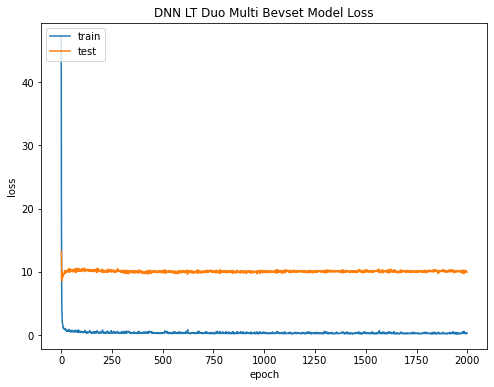

In [125]:
plt.figure(figsize=(8,6))
plt.plot(History_duoLT_multi.history['loss'])
plt.plot(History_duoLT_multi.history['val_loss'])
#plt.plot.set_facecolor('white')
plt.title('DNN LT Duo Multi Bevset Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.xlim(0,200)
#plt.yscale("log")
plt.legend(['train', 'test'], loc='upper left')

#plt.show()
plt.savefig('DNN_duo_multi_bevset_training_2000_2.png',facecolor='white')

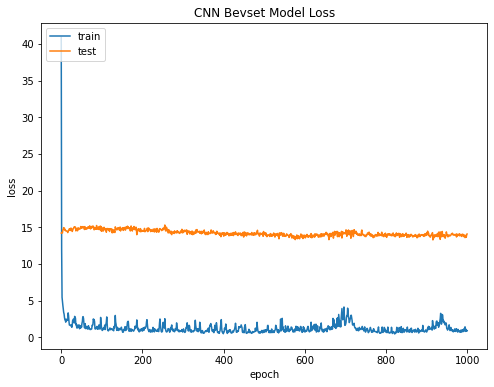

In [119]:
plt.figure(figsize=(8,6))
plt.plot(History_PL.history['loss'])
plt.plot(History_PL.history['val_loss'])
#plt.plot.set_facecolor('white')
plt.title('CNN Bevset Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.xlim(0,500)
#plt.yscale("log")
plt.legend(['train', 'test'], loc='upper left')

#plt.show()
plt.savefig('CNN_bevset_training_1000.png',facecolor='white')

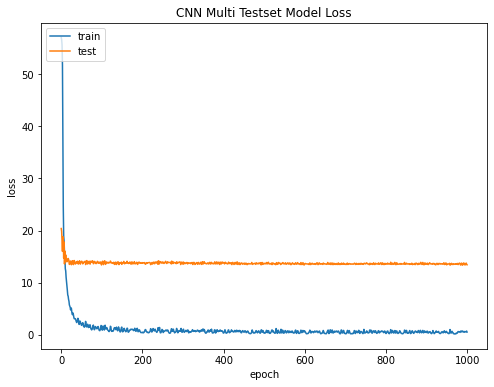

In [35]:
plt.figure(figsize=(8,6))
plt.plot(History_PLthree_bev.history['loss'])
plt.plot(History_PLthree_bev.history['val_loss'])
#plt.plot.set_facecolor('white')
plt.title('CNN Multi Testset Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.yscale("log")
plt.legend(['train', 'test'], loc='upper left')

#plt.show()
plt.savefig('CNN_multi_bev_training_1000.png',facecolor='white')

In [30]:
# plt.figure(figsize=(8,6))
# plt.plot(History2.history['loss'])
# plt.plot(History2.history['val_loss'])
# #plt.plot.set_facecolor('white')
# plt.title('CNN/DNN Combi Map Model Loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# #plt.yscale("log")
# plt.legend(['train', 'test'], loc='upper left')

# # plt.show()
# #plt.savefig('CNN_DNN_combi_training_500.png',facecolor='white')

/Users/aaron/miniforge3/envs/tensorflow/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


Text(0.5, 1.0, 'CNN/DNN Background Beverage Accuracy')

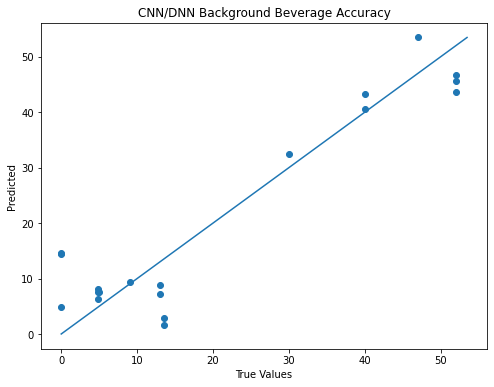

In [173]:
plt.figure(figsize=(8,6))

plt.scatter(bevlabels100PL,pred)
# plt.plot(PL100obs['max_ind'], m*PL100obs['max_ind'] + b)
p1 = max(max(pred), max(bevlabels100PL))
p2 = min(min(pred), min(bevlabels100PL))
plt.plot([p1, p2], [p1, p2])#, 'b-')

plt.xlabel('True Values')
plt.ylabel('Predicted')
plt.title('CNN/DNN Background Beverage Accuracy')
#plt.show()
# plt.legend(['measured', 'fit (mae 7.6%)'], loc='upper right')
#plt.savefig("CNNN_DNN_combi_bg_accuracy_bev.png",facecolor='white')